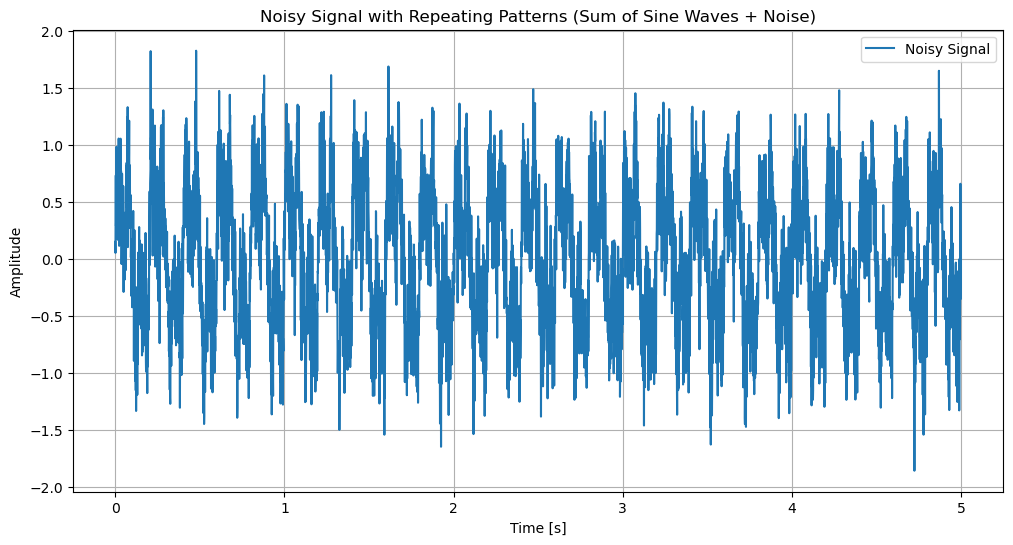

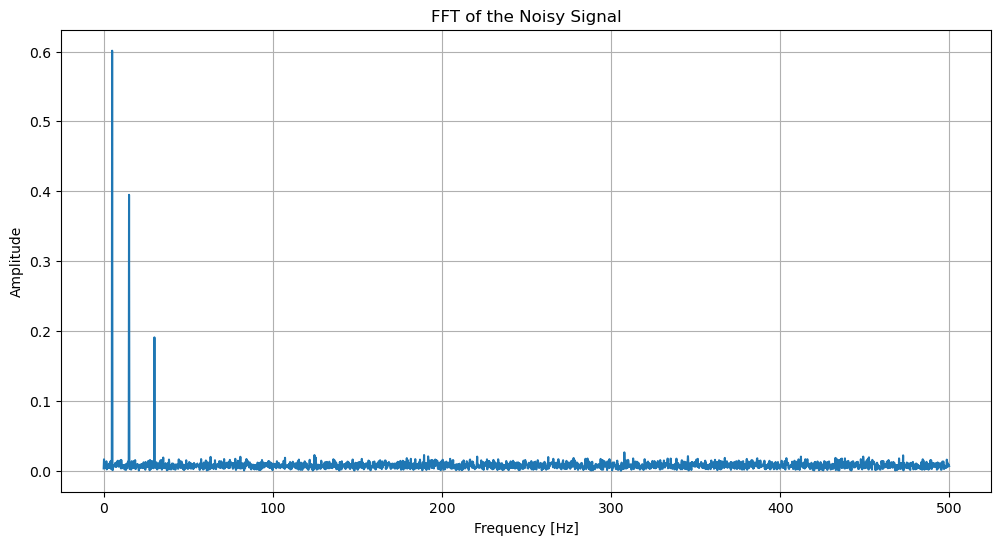

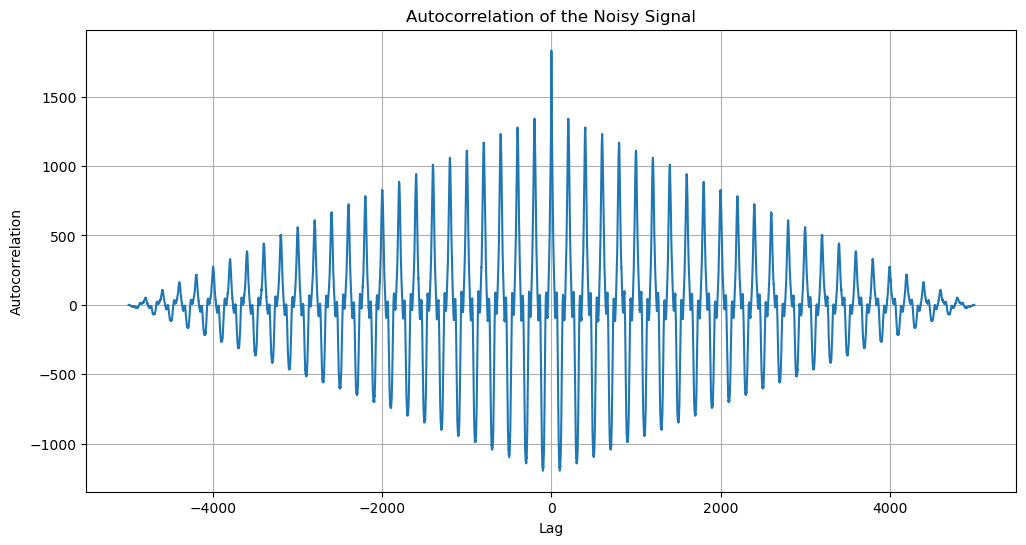

In [3]:
#1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import correlate


sampling_rate = 1000  
duration = 5  
t = np.linspace(0, duration, sampling_rate * duration, endpoint=False)  # Time axis


signal = 0.6 * np.sin(2 * np.pi * 5 * t) + 0.4 * np.sin(2 * np.pi * 15 * t) + 0.2 * np.sin(2 * np.pi * 30 * t)


np.random.seed(42)  
noise = 0.3 * np.random.normal(size=t.shape)
noisy_signal = signal + noise


plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Noisy Signal with Repeating Patterns (Sum of Sine Waves + Noise)')
plt.legend()
plt.grid(True)
plt.show()


N = len(t)
yf = fft(noisy_signal)
xf = fftfreq(N, 1 / sampling_rate)


plt.figure(figsize=(12, 6))
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))  
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('FFT of the Noisy Signal')
plt.grid(True)
plt.show()


autocorr = correlate(noisy_signal, noisy_signal, mode='full')
lags = np.arange(-len(noisy_signal) + 1, len(noisy_signal))


plt.figure(figsize=(12, 6))
plt.plot(lags, autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the Noisy Signal')
plt.grid(True)
plt.show()


In [ ]:
Methods for Time Series Analysis:
1.Autocorrelation:
Purpose: Measures the similarity of a time series with a lagged version of itself to detect repeating patterns.
Application: Used in detecting seasonality or cyclic trends in data (e.g., stock market cycles, seasonal sales).
Machine Learning: Can extract features like periodicity or seasonality, which help in time series forecasting models.

2.Fourier Transform (FFT):
Purpose: Converts time-domain signals into frequency-domain to reveal dominant frequencies.
Application: Used in fields like audio processing or signal detection.
Machine Learning: Frequency components derived from FFT can serve as features for models that predict periodic events, such as fault detection in machinery.


3.Wavelet Transform:
Purpose: Captures both frequency and time information, making it more suitable for non-stationary time series (e.g., EEG signals).
Application: Used in time-frequency analysis for medical signals, seismic data, and more.
Machine Learning: Wavelet coefficients can act as feature vectors to classify non-stationary data or detect anomalies in financial or sensor data.


4.Seasonal Decomposition (STL):
Purpose: Breaks down a time series into trend, seasonal, and residual components.
Application: Common in business analytics for trend forecasting.
Machine Learning: Helps models focus on the trend component for prediction, while seasonality can be used to enhance prediction accuracy.


5.Recurrence Plot Analysis:
Purpose: Visualizes repeating patterns by plotting recurrence of states in a phase space.
Application: Used in complex systems like climate modeling or physiological data.
Machine Learning: Recurrence plot features can be used in deep learning models for pattern recognition tasks.


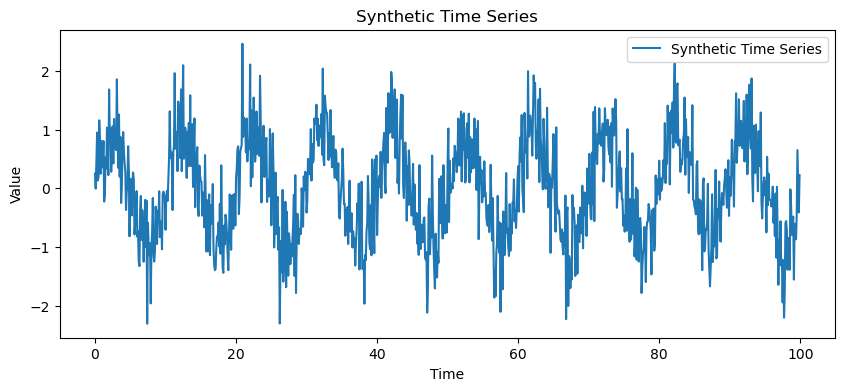

In [17]:
#Step 1: Importing Libraries and Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fftpack import fft
from scipy.signal import find_peaks

# Generate synthetic time series data (sinusoidal with noise)
np.random.seed(42)
time = np.arange(0, 100, 0.1)
data = np.sin(2 * np.pi * 0.1 * time) + 0.5 * np.random.normal(size=len(time))

# Create a DataFrame
df = pd.DataFrame({'Time': time, 'Value': data})

# Plot the synthetic time series
plt.figure(figsize=(10, 4))
plt.plot(df['Time'], df['Value'], label='Synthetic Time Series')
plt.title('Synthetic Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


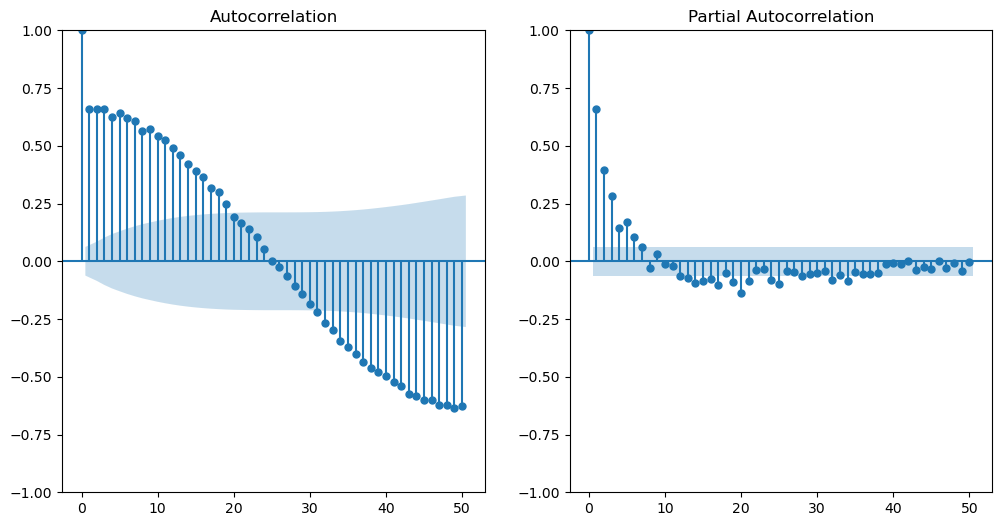

In [19]:
#Step 2: Autocorrelation and Partial Autocorrelation (ACF/PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Value'], lags=50, ax=plt.gca(), title="Autocorrelation")
plt.subplot(122)
plot_pacf(df['Value'], lags=50, ax=plt.gca(), title="Partial Autocorrelation")
plt.show()


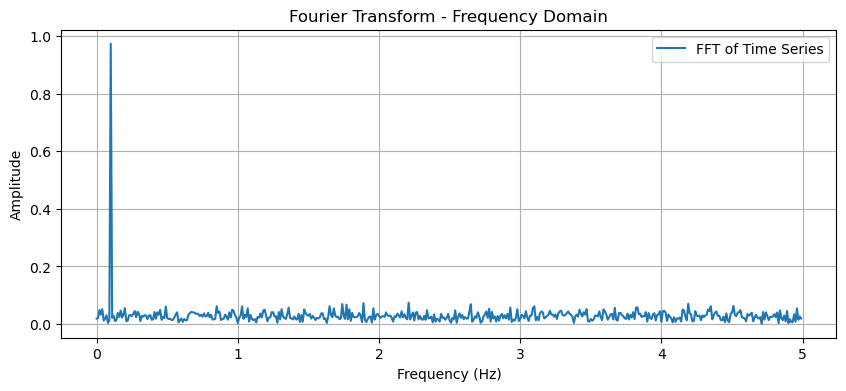

Dominant Frequencies: [0.1]


In [23]:
# Step 3: Fourier Transform for Frequency Analysis
# Perform Fourier Transform

N = len(df['Value'])
T = 0.1  # Time interval between samples

# Convert the Pandas Series to a NumPy array
values = df['Value'].to_numpy()

# Apply FFT
yf = fft(values)
xf = np.fft.fftfreq(N, T)[:N//2]

# Plot the FFT result
plt.figure(figsize=(10, 4))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), label='FFT of Time Series')
plt.title('Fourier Transform - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

# Identify peaks (i.e., dominant frequencies)
peaks, _ = find_peaks(2.0/N * np.abs(yf[:N//2]), height=0.1)
print("Dominant Frequencies:", xf[peaks])


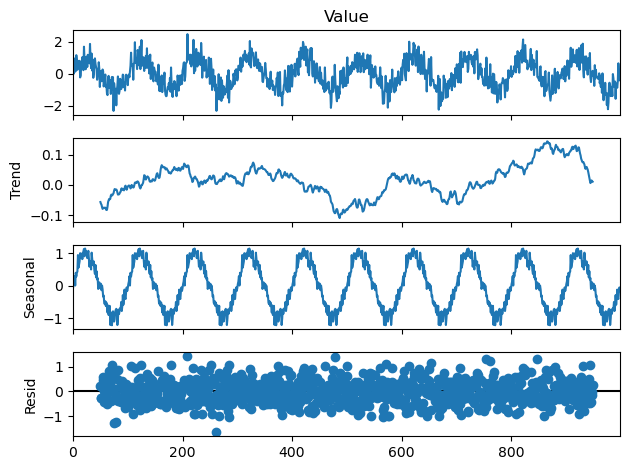

Trend Component: 
 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64
Seasonal Component: 
 0   -0.074605
1    0.050420
2    0.128305
3    0.293101
4    0.005468
Name: seasonal, dtype: float64
Residual Component: 
 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [25]:
# Decompose the time series using STL
result = seasonal_decompose(df['Value'], model='additive', period=100)

# Plot the decomposition
result.plot()
plt.show()

# Extract trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Display the components
print("Trend Component: \n", trend.head())
print("Seasonal Component: \n", seasonal.head())
print("Residual Component: \n", residual.head())


In [27]:
# Create a feature matrix with lagged values and decomposition components
df['Lag_1'] = df['Value'].shift(1)
df['Lag_2'] = df['Value'].shift(2)
df['Trend'] = trend
df['Seasonal'] = seasonal
df['Residual'] = residual

# Drop rows with NaN values due to shifting
df.dropna(inplace=True)

# Show the feature matrix
print(df.head())

# X is the feature matrix, y is the target (next time point prediction)
X = df[['Lag_1', 'Lag_2', 'Trend', 'Seasonal', 'Residual']]
y = df['Value']

print(f"Feature Matrix (X): \n{X.head()}")
print(f"Target Vector (y): \n{y.head()}")


    Time     Value     Lag_1     Lag_2     Trend  Seasonal  Residual
50   5.0  0.162042 -0.818730  0.297142 -0.056703 -0.013461  0.232207
51   5.1 -0.255332  0.162042 -0.818730 -0.062190  0.058430 -0.251572
52   5.2 -0.463794 -0.255332  0.162042 -0.065372 -0.140018 -0.258404
53   5.3  0.118457 -0.463794 -0.255332 -0.073661  0.003078  0.189040
54   5.4  0.266810  0.118457 -0.463794 -0.079292 -0.112368  0.458469
Feature Matrix (X): 
       Lag_1     Lag_2     Trend  Seasonal  Residual
50 -0.818730  0.297142 -0.056703 -0.013461  0.232207
51  0.162042 -0.818730 -0.062190  0.058430 -0.251572
52 -0.255332  0.162042 -0.065372 -0.140018 -0.258404
53 -0.463794 -0.255332 -0.073661  0.003078  0.189040
54  0.118457 -0.463794 -0.079292 -0.112368  0.458469
Target Vector (y): 
50    0.162042
51   -0.255332
52   -0.463794
53    0.118457
54    0.266810
Name: Value, dtype: float64


Mean Squared Error: 5.048472262054668e-31


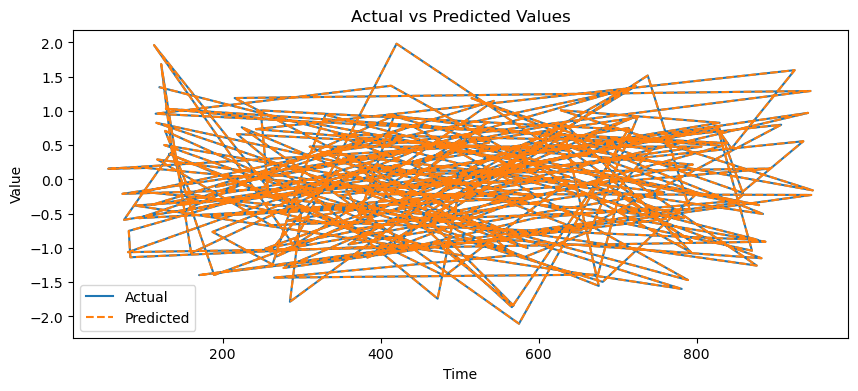

In [29]:
#Step 6: Example: Fitting a Simple Machine Learning Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 4))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
Explanation of Each Step:
Step 1: Data Generation and Plotting: This generates a synthetic sinusoidal time series with noise and visualizes it.
Step 2: Autocorrelation and PACF: We analyze lagged correlations to detect repeating patterns and potential seasonality.
Step 3: Fourier Transform: This transforms the time series to the frequency domain, allowing us to identify dominant cyclical patterns.
Step 4: Seasonal Decomposition (STL): We decompose the time series into trend, seasonality, and residuals for better feature extraction.
Step 5: Feature Vector Creation: Here, we construct features (lagged values, trend, seasonal components) that can be used as inputs for machine learning models.
Step 6: Example ML Model: We use a simple linear regression model to predict future values based on the extracted features.

In [ ]:
Use of Generative AI (ChatGPT) in Research
For this report, I used ChatGPT to assist in gathering information, summarizing techniques, and formulating examples. ChatGPT was particularly helpful in:

Explaining complex methods succinctly: The model quickly generated useful summaries of Fourier transforms, wavelet analysis, and autocorrelation.
Recommending relevant visuals: It provided useful insights on how ACF and wavelet transform visualizations could enhance understanding.

I have also used these websites as references in my research
https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

https://medium.com/@nomannayeem/comprehensive-guide-to-time-series-data-analytics-and-forecasting-with-python-2c82de2c8517